In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
ROOT="/content/drive"
drive.mount(ROOT, force_remount=True)

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/dlss24

/content/drive/MyDrive/dlss24


In [4]:
%pwd

'/content/drive/MyDrive/dlss24'

# Data

Download the corpora data from: https://codeocean.com/capsule/0078777/tree/v1

Uploaded to a location outside your gitHub (to do not be tracked)

You pwd should have the files:


1.   source_corpus.csv
2.   target_corpus.csv




# Module IV:  - Class 6 - Text Classifiers

This notebook have the network framework pytorch and how CNNs work

# Basic Pre processing and tokenization

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
#load the pickle file in OLAT
#df_dummies_model.to_pickle('df_dummies_model.pkl')

df_source_corpus=pd.read_csv('/content/drive/MyDrive/dlss24/source_corpus.csv')

In [ ]:
df_source_corpus.head()

,topic_44,topic_8,text
0,democracy,freedom and democracy,"Two hundred summers ago, this Democratic Party..."
1,freedom and human rights,freedom and democracy,"In 1992, the party Thomas Jefferson founded in..."
2,law and order,fabric of society,Our land reverberates with a battle cry of fru...
3,no topic,no topic,America is on the wrong track.
4,civic mindedness,fabric of society,The American people are hurting.




> Create a plot with the number of sentences (or rows) per topic



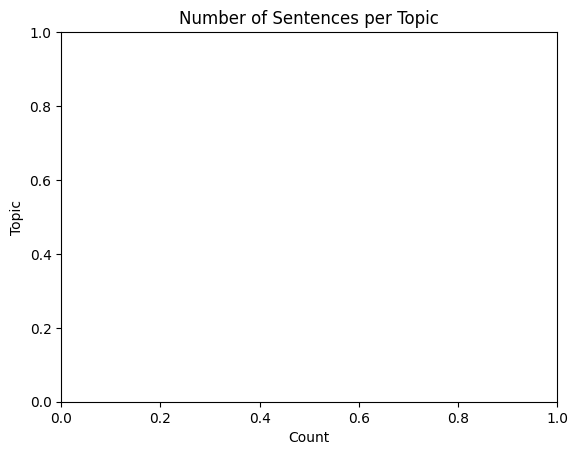

In [ ]:
#### YOUR CODE STARTS HERE ####
from matplotlib import pyplot as plt
import seaborn as sns

...

# Add labels and title if needed
plt.xlabel('Count')
plt.ylabel('Topic')
plt.title('Number of Sentences per Topic')

# Show the plot
plt.show()


##### YOUR CODE ENDS HERE ####

In [10]:
grouped_data

topic_8
economy                        29111
external relations              7663
fabric of society              12706
freedom and democracy           5566
no topic                         935
political system               11664
social groups                  11505
welfare and quality of life    36260
dtype: int64

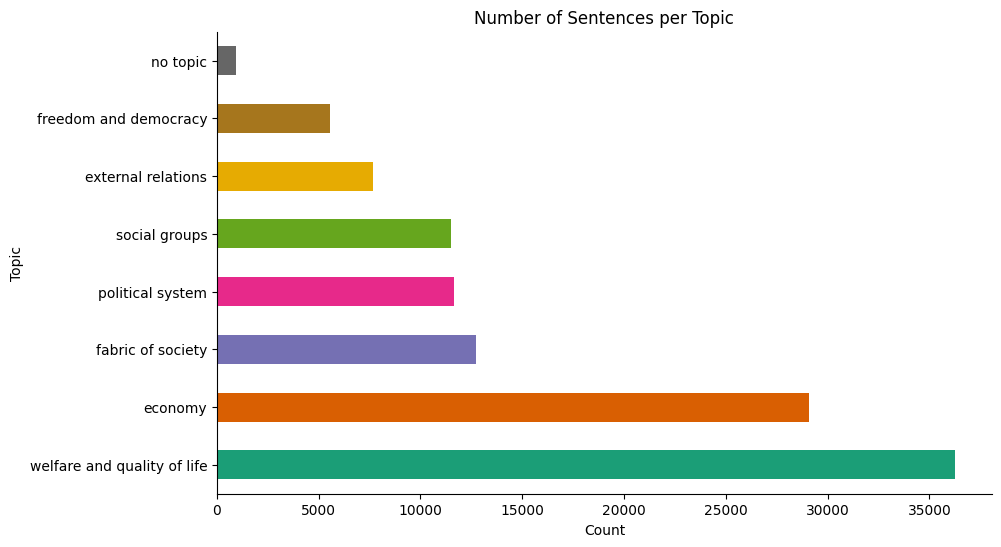

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns


# Group the DataFrame by 'topic_8' and calculate the size of each group
grouped_data = df_source_corpus.groupby('topic_8').size()

# Sort the grouped data by size in descending order
sorted_data = grouped_data.sort_values(ascending=False)

# Plot the sorted data as a horizontal bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sorted_data.plot(kind='barh', color=sns.color_palette('Dark2', len(sorted_data)))

# Remove top and right spines from the plot
plt.gca().spines[['top', 'right']].set_visible(False)

# Add labels and title if needed
plt.xlabel('Count')
plt.ylabel('Topic')
plt.title('Number of Sentences per Topic')

# Show the plot
plt.show()

## Sentence Tokenization

In [11]:
text = "K. Alex Müller on the right track: Soon afterwards, he and M.A's J. Georg Bednorz discovered the first high-temperature superconductor. The 2 are nobel prize winners."

**NLTK**: fast with some errors

In [12]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
# by puntuation
sentences = sent_tokenize(text) # split document into sentences
print(sentences)

["K. Alex Müller on the right track: Soon afterwards, he and M.A's J. Georg Bednorz discovered the first high-temperature superconductor.", 'The 2 are nobel prize winners.']


**Spacy**: better than NLTK

In [15]:
import spacy
# by language
nlp = spacy.load('en_core_web_sm')


In [17]:
doc = nlp(text)
sentences = list(doc.sents)
print(sentences)

[K. Alex Müller on the right track: Soon afterwards, he and M.A's J. Georg Bednorz discovered the first high-temperature superconductor., The 2 are nobel prize winners.]


In [19]:
doc.sentiment

0.0

# Pre Processing



0.   Choose the unit (sentence, document, paragraph, speech)

1.   Capitalization
2.   Puntuation
3.   Tokens
4.   Numbers
5.   Stopwords
6.   Stemming
7.   Lemmatizing



### 1. Capitalization

In [20]:
# Capitalization
text_lower = text.lower() # go to lower-case

In [21]:
text_lower

"k. alex müller on the right track: soon afterwards, he and m.a's j. georg bednorz discovered the first high-temperature superconductor. the 2 are nobel prize winners."

### 2. Punctuation

In [22]:
# recipe for fast punctuation removal
from string import punctuation
print ("punctuation:", punctuation)

punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [23]:
#maktrans function from str, args are: find-character, replace-character, remove-character
punc_remover = str.maketrans('','',punctuation)
text_nopunc = text_lower.translate(punc_remover)
print(text_nopunc)

k alex müller on the right track soon afterwards he and mas j georg bednorz discovered the first hightemperature superconductor the 2 are nobel prize winners


### 3. Tokenization of words

In [24]:
# Tokens
tokens = text_nopunc.split() # splits a string on white space
print(tokens)

['k', 'alex', 'müller', 'on', 'the', 'right', 'track', 'soon', 'afterwards', 'he', 'and', 'mas', 'j', 'georg', 'bednorz', 'discovered', 'the', 'first', 'hightemperature', 'superconductor', 'the', '2', 'are', 'nobel', 'prize', 'winners']


### 4. Numbers



> Replace the number found by the # character



In [ ]:
#### YOUR CODE STARTS HERE ####



# keep if not a digit, else replace with "#"
norm_numbers = ...
#print(no_numbers )
print(norm_numbers)



##### YOUR CODE ENDS HERE ####

['k', 'alex', 'müller', 'on', 'the', 'right', 'track', 'soon', 'afterwards', 'he', 'and', 'mas', 'j', 'georg', 'bednorz', 'discovered', 'the', 'first', 'hightemperature', 'superconductor', 'the', 'are', 'nobel', 'prize', 'winners']
Ellipsis


In [ ]:
</""

In [28]:
[t   for t in tokens if t!='</""' ]

['k',
 'alex',
 'müller',
 'on',
 'the',
 'right',
 'track',
 'soon',
 'afterwards',
 'he',
 'and',
 'mas',
 'j',
 'georg',
 'bednorz',
 'discovered',
 'the',
 'first',
 'hightemperature',
 'superconductor',
 'the',
 'are',
 'nobel',
 'prize',
 'winners']

In [29]:
[t if not t.isdigit() else '#' for t in tokens ]

['k',
 'alex',
 'müller',
 'on',
 'the',
 'right',
 'track',
 'soon',
 'afterwards',
 'he',
 'and',
 'mas',
 'j',
 'georg',
 'bednorz',
 'discovered',
 'the',
 'first',
 'hightemperature',
 'superconductor',
 'the',
 '#',
 'are',
 'nobel',
 'prize',
 'winners']

In [ ]:
[t if not t.isdigit() else '#' for t in tokens ]

for t in tokens:
  if not t.isdigit():
    t
    else:
      '#'

In [34]:
#### YOUR CODE STARTS HERE ####



# keep if not a digit, else replace with "#"
norm_numbers = [t if not t.isdigit() else '#'
                for t in tokens ]

print(norm_numbers)



##### YOUR CODE ENDS HERE ####

['k', 'alex', 'müller', 'on', 'the', 'right', 'track', 'soon', 'afterwards', 'he', 'and', 'mas', 'j', 'georg', 'bednorz', 'discovered', 'the', 'first', 'hightemperature', 'superconductor', 'the', '#', 'are', 'nobel', 'prize', 'winners']


### 5. Stopwords

From NLTK

In [30]:
# Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
stoplist = stopwords.words('english')
print ("stop words:", stoplist)

stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [35]:
# keep if not a stopword
nostop = [t for t in norm_numbers if t not in stoplist]
print(nostop)

['k', 'alex', 'müller', 'right', 'track', 'soon', 'afterwards', 'mas', 'j', 'georg', 'bednorz', 'discovered', 'first', 'hightemperature', 'superconductor', '#', 'nobel', 'prize', 'winners']


From scikit-learn

In [36]:
# scikit-learn stopwords
# depending on sklearn version, for sklearn==0.24.1, stop_words are here
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS as stop_words
sorted(list(stop_words))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

In [37]:
# spacy stopwords
sorted(list(nlp.Defaults.stop_words))[:20]

["'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also']

### 6. Stemming

Heuristic based, reduce variations of words like -ed, -s

In [ ]:
# Stemming
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english') # snowball stemmer, english

In [ ]:
# remake list of tokens, replace with stemmed versions
tokens_stemmed = [stemmer.stem(t) for t in tokens]
print(tokens_stemmed)

['k', 'alex', 'müller', 'on', 'the', 'right', 'track', 'soon', 'afterward', 'he', 'and', 'mas', 'j', 'georg', 'bednorz', 'discov', 'the', 'first', 'hightemperatur', 'superconductor', 'the', '2', 'are', 'nobel', 'prize', 'winner']


### 7. Lemmatizing

Linguistic-based, reduces words with linguistic meaning. Superlatives and Verbs infinitive/base form.

In [ ]:
# Lemmatizing
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
wnl = WordNetLemmatizer()
wnl.lemmatize('corporation'), wnl.lemmatize('corporations')

('corporation', 'corporation')

In [ ]:
stemmer.stem('corporations')

'corpor'

In [ ]:
wnl.lemmatize('was')

'wa'

In [ ]:
wnl.lemmatize('went') #go

'went'

In [ ]:
wnl.lemmatize('better') #good

'better'

In [38]:
df_source_corpus.head()

,topic_44,topic_8,text
0,democracy,freedom and democracy,"Two hundred summers ago, this Democratic Party..."
1,freedom and human rights,freedom and democracy,"In 1992, the party Thomas Jefferson founded in..."
2,law and order,fabric of society,Our land reverberates with a battle cry of fru...
3,no topic,no topic,America is on the wrong track.
4,civic mindedness,fabric of society,The American people are hurting.


All in one function:

In [40]:
from string import punctuation
translator = str.maketrans('','',punctuation)
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def normalize_text(doc):
    "Input doc and return clean list of tokens"
    doc = doc.replace('\r', ' ').replace('\n', ' ')
    lower = doc.lower() # all lower case
    nopunc = lower.translate(translator) # remove punctuation
    words = nopunc.split() # split into tokens
    nostop = [w for w in words if w not in stoplist] # remove stopwords
    no_numbers = [w if not w.isdigit() else '#' for w in nostop] # normalize numbers
    stemmed = [stemmer.stem(w) for w in no_numbers] # stem each word
    return stemmed



> Apply the normalized_text function to the text column of df_source_corpus




In [ ]:
#### YOUR CODE STARTS HERE ####


df_source_corpus['tokens_cleaned'] = ...




##### YOUR CODE ENDS HERE ####

In [41]:
df_source_corpus['tokens_cleaned'] = df_source_corpus['text'].apply(normalize_text)
df_source_corpus['tokens_cleaned']

AttributeError: 'float' object has no attribute 'replace'

Print the rows that are not string and add a clening step

In [42]:
non_string_rows = df_source_corpus[~df_source_corpus['text'].apply(lambda x: isinstance(x, str))]


In [43]:
non_string_rows


,topic_44,topic_8,text
30723,freedom and human rights,freedom and democracy,NaN
111003,welfare state expansion,welfare and quality of life,NaN


In [44]:
df_source_corpus = df_source_corpus.dropna(subset=['text'])
df_source_corpus['tokens_cleaned'] = df_source_corpus['text'].apply(normalize_text)
df_source_corpus['tokens_cleaned']

0         [two, hundr, summer, ago, democrat, parti, fou...
1         [#, parti, thoma, jefferson, found, invok, spi...
2         [land, reverber, battl, cri, frustrat, eman, a...
3                                   [america, wrong, track]
4                                   [american, peopl, hurt]
                                ...                        
115405    [theyll, run, deficit, ultim, necessit, massiv...
115406    [drive, price, everyth, canadian, famili, buy,...
115407    [threaten, canada, econom, prospect, shut, res...
115408    [bring, back, cost, wast, ineffect, longgun, r...
115409    [repeal, import, reform, strengthen, canadian,...
Name: tokens_cleaned, Length: 115408, dtype: object

**Gensim**: All in one

In [ ]:
from gensim.utils import simple_preprocess # lowercase, tokenized, punctuations/numbers removed
print(simple_preprocess(text))

['alex', 'müller', 'on', 'the', 'right', 'track', 'soon', 'afterwards', 'he', 'and', 'georg', 'bednorz', 'discovered', 'the', 'first', 'high', 'temperature', 'superconductor', 'the', 'are', 'nobel', 'prize', 'winners']


In [ ]:
# I have cleaned 'text' colunm before
df_source_corpus['tokens_cleaned'] = df_source_corpus['text'].apply(simple_preprocess)
df_source_corpus['tokens_cleaned']

0         [two, hundred, summers, ago, this, democratic,...
1         [in, the, party, thomas, jefferson, founded, i...
2         [our, land, reverberates, with, battle, cry, o...
3                      [america, is, on, the, wrong, track]
4                     [the, american, people, are, hurting]
                                ...                        
115405    [they, ll, do, this, by, running, deficits, th...
115406    [driving, up, the, price, of, everything, cana...
115407    [threatening, canada, economic, prospects, by,...
115408    [bringing, back, the, costly, wasteful, and, i...
115409    [repealing, our, important, reforms, that, hav...
Name: tokens_cleaned, Length: 115408, dtype: object

(OPTIONAL) If you want to customize the gensim:

In [ ]:
complicated_text = "<div>Prof. Zurich <i>hailed</i> from Zurich., She got 3 M.A.'s from ETH.</div>" # added html tags

from gensim.parsing.preprocessing import preprocess_string, \
strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short, stem_text

preprocess_string(complicated_text) # with all default filters: lowercase, tags, puncations, whitespaces, numerics, short words, stop words.

# remove some filters to keep more tokens.
# e.g. If I want to keep stopwords, short words, and numbers and keep the words not stemmed
CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation, strip_multiple_whitespaces]
preprocess_string(complicated_text, CUSTOM_FILTERS) # only use the customized filters

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-115-b6a3b95e667f>", line 3, in <cell line: 3>
    from gensim.parsing.preprocessing import preprocess_string, \
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/intera

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-115-b6a3b95e667f>", line 3, in <cell line: 3>
    from gensim.parsing.preprocessing import preprocess_string, \
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/intera

# Full analysis with Spacy

In [45]:
dfs = df_source_corpus.sample(1000)
# Reality
dfs['doc'] = dfs['text'].apply(nlp)

In [46]:
dfs['doc'].head()

33191    (increase, access, by, disabled, people, to, t...
70759    (Yet, families, that, have, been, on, welfare,...
32806    (review, the, terms, of, the, cap, on, tax, re...
40955    (Ireland, is, 100, %, compliant, with, EU, air...
17256    (We, will, implement, the, proposals, of, Labo...
Name: doc, dtype: object

In [47]:
dfs=dfs.reset_index()

In [49]:
# The spacy model already gives you sentences and tokens.
# For example:
sent1 = list(dfs['doc'].iloc[0].sents)[0]
sent1 # sentence

increase access by disabled people to the workforce by allowing them to earn over €120 per week without losing the Disability Allowance;

In [50]:
# tokens
list(sent1)

[increase,
 access,
 by,
 disabled,
 people,
 to,
 the,
 workforce,
 by,
 allowing,
 them,
 to,
 earn,
 over,
 €,
 120,
 per,
 week,
 without,
 losing,
 the,
 Disability,
 Allowance,
 ;]

In [51]:
# lemmas
[x.lemma_ for x in sent1]

['increase',
 'access',
 'by',
 'disabled',
 'people',
 'to',
 'the',
 'workforce',
 'by',
 'allow',
 'they',
 'to',
 'earn',
 'over',
 '€',
 '120',
 'per',
 'week',
 'without',
 'lose',
 'the',
 'Disability',
 'Allowance',
 ';']

In [52]:
# POS tags
[x.tag_ for x in sent1]

['VB',
 'NN',
 'IN',
 'JJ',
 'NNS',
 'IN',
 'DT',
 'NN',
 'IN',
 'VBG',
 'PRP',
 'TO',
 'VB',
 'IN',
 '$',
 'CD',
 'IN',
 'NN',
 'IN',
 'VBG',
 'DT',
 'NNP',
 'NNP',
 ':']

In [53]:
from collections import Counter
# Initialize a Counter to count tokens
token_counter = Counter()

# Iterate over each Doc object in the 'doc' column and count tokens
for doc in dfs['doc']:
    token_counter.update([token.text for token in doc])

# Print the token counts
print(token_counter)

Counter({'the': 945, '.': 822, 'and': 757, ',': 676, 'to': 674, 'of': 599, 'in': 347, 'a': 314, 'will': 299, 'for': 279, 'that': 198, '-': 181, 'We': 169, 'is': 152, 'by': 135, 'with': 135, 'be': 122, 'our': 120, 'on': 118, 'are': 117, 'The': 93, 'we': 87, 'their': 87, 'as': 87, ' ': 77, 'have': 75, 'from': 74, '’s': 65, 'or': 65, 'more': 64, 'all': 64, 'new': 63, 'people': 58, 'ensure': 58, 'an': 53, 'at': 51, 'has': 50, 'government': 50, 'public': 48, 'support': 48, 'not': 47, 'health': 46, 'which': 44, 'work': 44, 'this': 44, 'This': 41, ';': 39, 'through': 39, ')': 38, 'can': 38, 'it': 37, 'system': 35, ':': 34, '•': 34, 'over': 33, '(': 33, 'education': 32, '$': 32, 'economic': 32, 'been': 31, 'its': 31, 'Government': 31, 'make': 30, 'provide': 30, 'local': 30, 'services': 29, 'they': 29, 'who': 29, 'Australia': 29, 'years': 29, 'increase': 28, 'tax': 28, 'National': 28, 'South': 28, 'should': 27, 'community': 27, 'other': 27, 'economy': 27, 'out': 27, "'s": 27, '–': 27, 'children

In [ ]:
token_counter.most_common()[:20]

[('the', 881),
 ('.', 793),
 ('to', 728),
 ('and', 715),
 (',', 626),
 ('of', 560),
 ('in', 345),
 ('a', 319),
 ('will', 281),
 ('for', 249),
 ('-', 186),
 ('that', 170),
 ('We', 147),
 ('is', 142),
 ('with', 138),
 ('our', 122),
 ('be', 121),
 ('on', 113),
 ('by', 106),
 ('are', 104)]



> Print the 20 least common tokens




In [ ]:
#### YOUR CODE STARTS HERE ####


 ...




##### YOUR CODE ENDS HERE ####

In [ ]:
token_counter.most_common()[-20:]

[('4bn', 1),
 ('Programme', 1),
 ('RDP', 1),
 ('injury', 1),
 ('July', 1),
 ('1993', 1),
 ('views', 1),
 ('concerned', 1),
 ('direction', 1),
 ('recognised', 1),
 ('stance', 1),
 ('accompanied', 1),
 ('inner', 1),
 ('hallmarks', 1),
 ('transformed', 1),
 ('Disciplinary', 1),
 ('instituted', 1),
 ('warranted', 1),
 ('Watching', 1),
 ('Briefs', 1)]

In [55]:
len(token_counter)

4441

In [57]:
dfs['num_words'] = dfs['doc'].apply(lambda x: len(list(x)))
dfs['num_sents'] = dfs['doc'].apply(lambda x: len(list(x.sents)))


print(len(token_counter),'words in corpus.')
words_per_sent = len(token_counter) / len(dfs['doc'])
print(words_per_sent,'words per sentence.')

4441 words in corpus.
4.441 words per sentence.


In [59]:
dfs['num_words'].sum(axis=0)

21165

[CountVectorizer Doc](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [61]:
dfs.shape [1000,1000]

(1000, 8)

In [62]:
dfs.columns

Index(['index', 'topic_44', 'topic_8', 'text', 'tokens_cleaned', 'doc',
       'num_words', 'num_sents'],
      dtype='object')

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,
                        max_features=1000,
                        stop_words='english',
                        ngram_range=(1,3))
X = vec.fit_transform(dfs['text'])

# save the vectors
#pd.to_pickle(X,'X.pkl')



In [68]:
X.toarray().shape

(1000, 185)

In [69]:
X[0].toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [71]:
vec.get_feature_names_out()

array(['000', '100', 'able', 'access', 'act', 'action', 'africa', 'allow',
       'areas', 'australia', 'australian', 'available', 'based', 'basis',
       'believe', 'benefit', 'benefits', 'best', 'better', 'billion',
       'build', 'building', 'business', 'businesses', 'care', 'cent',
       'change', 'child', 'children', 'commission', 'commitment',
       'communities', 'community', 'continue', 'cost', 'costs', 'country',
       'create', 'crime', 'current', 'currently', 'deliver', 'democratic',
       'develop', 'development', 'economic', 'economy', 'education',
       'effective', 'employment', 'encourage', 'end', 'energy', 'ensure',
       'ensuring', 'environment', 'establish', 'fair', 'families',
       'family', 'federal', 'fine', 'fine gael', 'food', 'free', 'fund',
       'funding', 'future', 'gael', 'generation', 'global', 'government',
       'greater', 'growth', 'health', 'help', 'high', 'home', 'homes',
       'housing', 'improve', 'including', 'income', 'increase',
   



> Print the shape of the Count Vectorizer and one of its samples



In [ ]:
#### YOUR CODE STARTS HERE ####


 ...




##### YOUR CODE ENDS HERE ####

In [ ]:
X[0].toarray()

In [ ]:
X.shape

(1000, 164)

In [70]:
vec.get_feature_names_out()

array(['000', '100', 'able', 'access', 'act', 'action', 'africa', 'allow',
       'areas', 'australia', 'australian', 'available', 'based', 'basis',
       'believe', 'benefit', 'benefits', 'best', 'better', 'billion',
       'build', 'building', 'business', 'businesses', 'care', 'cent',
       'change', 'child', 'children', 'commission', 'commitment',
       'communities', 'community', 'continue', 'cost', 'costs', 'country',
       'create', 'crime', 'current', 'currently', 'deliver', 'democratic',
       'develop', 'development', 'economic', 'economy', 'education',
       'effective', 'employment', 'encourage', 'end', 'energy', 'ensure',
       'ensuring', 'environment', 'establish', 'fair', 'families',
       'family', 'federal', 'fine', 'fine gael', 'food', 'free', 'fund',
       'funding', 'future', 'gael', 'generation', 'global', 'government',
       'greater', 'growth', 'health', 'help', 'high', 'home', 'homes',
       'housing', 'improve', 'including', 'income', 'increase',
   

In [ ]:
len(vec.get_feature_names_out())

In [72]:
# Select tokens with counts greater than 300
selected_tokens = {token: count for token, count in token_counter.items() if 12< count < 90 }


In [74]:
len(selected_tokens)

184

Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency.


In [75]:
# tf-idf vectorizer up-weights rare/distinctive words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.01,
                        max_df=0.9,
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2),
                        smooth_idf=True)

X_tfidf = tfidf.fit_transform(dfs['text'])
#pd.to_pickle(X_tfidf,'X_tfidf.pkl')

In [76]:
X_tfidf[0].toarray()

array([[0.        , 0.        , 0.        , 0.64188122, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [77]:
dfs['topic_8'].value_counts()

topic_8
welfare and quality of life    323
economy                        246
political system               103
fabric of society              103
social groups                   94
external relations              77
freedom and democracy           47
no topic                         7
Name: count, dtype: int64

In [79]:
vocab = tfidf.get_feature_names_out()
vocab[:10], vocab[-10:]

(array(['000', '100', 'able', 'access', 'act', 'action', 'africa', 'allow',
        'areas', 'australia'], dtype=object),
 array(['use', 'women', 'work', 'workers', 'working', 'world', 'year',
        'years', 'young', 'zealand'], dtype=object))

welfare and quality of life


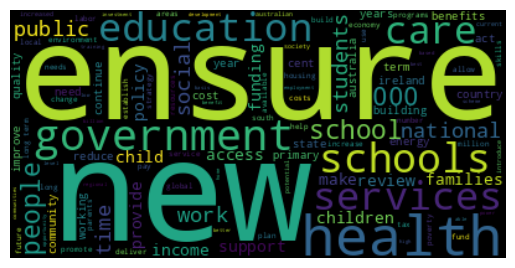

economy


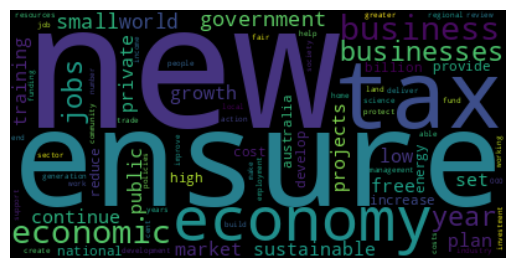

social groups


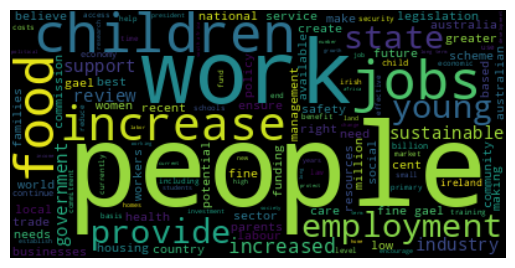

political system


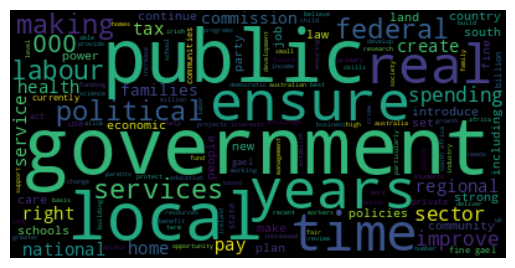

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

for topic_id in ['welfare and quality of life','economy','social groups','political system']:
    slicer = dfs['topic_8'] == topic_id

    #selecting rows
    f = X_tfidf[slicer.values]

    #sum of freq per row
    total_freqs = list(np.array(f.sum(axis=0))[0])

    #put vocab and frew to feed Wordcloud
    fdict = dict(zip(vocab,total_freqs))
    # generate word cloud of words with highest counts
    wordcloud = WordCloud().generate_from_frequencies(fdict)
    print(topic_id)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()



> Use the replication material to build a Political Science Topic Classifier

[Topic Classification for Political Texts](https://www.cambridge.org/core/journals/political-analysis/article/crossdomain-topic-classification-for-political-texts/F074564984969CE168BCBCF5E7D931C8#article)


*What could they have done different in the pre process step?*

In [ ]:
#### YOUR CODE STARTS HERE ####


 ...




##### YOUR CODE ENDS HERE ####

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, balanced_accuracy_score
from multiprocessing import cpu_count
cpus = cpu_count() - 1


##Prepare data


#Read manifesto data
data = pd.read_csv('/content/drive/MyDrive/dlss24/source_corpus.csv', encoding='utf-8', sep=',')
data = data[['topic_8', 'text']]

#Rename several topic
data['topic_8'] = data['topic_8'].astype(str)
data['text'] = data['text'].astype(str)

data = shuffle(data, random_state=87)

X = data['text']
Y = data['topic_8']

tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, ngram_range=(1,3), min_df=10, max_df=.4)
tfidf_vectorizer.fit(X)
print(X.shape)



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75, random_state=77)

#Reset the index
X_test = X_test.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



##Train and assess model using training and test set


#Cross-validated grid-search
lin_clf = LogisticRegression(solver='newton-cg',
                             multi_class='multinomial',
                             n_jobs=cpus)

param_grid = {'C':[1,2,10,100], 'class_weight':[None,'balanced']}
CV_clf = GridSearchCV(estimator=lin_clf, param_grid=param_grid, cv=3)
CV_clf.fit(X_train_tfidf, Y_train)
print(CV_clf.best_params_)

#Train model on training data using best parameters
lin_clf2 = LogisticRegression(C=CV_clf.best_params_['C'], class_weight=CV_clf.best_params_['class_weight'], solver='newton-cg', multi_class='multinomial', n_jobs=cpus)

lin_clf2.fit(X_train_tfidf, Y_train)
Y_pred = lin_clf2.predict(X_test_tfidf)

#Table 2: Compute within-domain metrics
metrics = {'metric': ['Top-1 Accuracy', 'F1 Score (Micro)', 'Balanced Accuracy', 'F1 Score (Macro)'], 'score': [accuracy_score(Y_test, Y_pred), f1_score(Y_test, Y_pred, average='micro'), balanced_accuracy_score(Y_test, Y_pred), f1_score(Y_test, Y_pred, average='macro')]}
metrics = pd.DataFrame(metrics)
metrics['domain'] = 'within-domain'
metrics['topics'] = '8'

(115410,)
{'C': 2, 'class_weight': None}


In [ ]:
#This was in 2019
metrics

,metric,score,domain,topics
0,Top-1 Accuracy,0.641043,within-domain,8
1,F1 Score (Micro),0.641043,within-domain,8
2,Balanced Accuracy,0.504325,within-domain,8
3,F1 Score (Macro),0.523126,within-domain,8


In [ ]:
#This was in 2023
# https://manifesto-project.wzb.eu/information/documents/manifestoberta
